# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

# DATA LOADING

In [2]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print("Training Data")
display(train_data.head())
print("Shape of the training data : ", train_data.shape)

print()

test_data = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
print("Testing Data")
display(test_data.head())
print("Shape of the training data : ", test_data.shape)

print()


test_data_solution = pd.read_csv("test_data_solution.txt", sep=':::', names=['TITLE', 'GENRE' ,'DESCRIPTION'])
print("Test Data solution")
display(test_data_solution.head())
print("Shape of the training data : ", test_data_solution.shape)

Training Data


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Shape of the training data :  (54214, 4)

Testing Data


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


Shape of the training data :  (54200, 3)

Test Data solution


,TITLE,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Shape of the training data :  (54200, 3)


# EDA

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [5]:
train_data.describe(include='object').T

,count,unique,top,freq
TITLE,54214,54214,Nature's Fury: Storm of the Century (2006),1
GENRE,54214,27,drama,13613
DESCRIPTION,54214,54086,Grammy - music award of the American academy ...,12


In [6]:
test_data.describe(include='object').T

,count,unique,top,freq
TITLE,54200,54200,Curitiba Zero Grau (2010),1
DESCRIPTION,54200,54072,Grammy - music award of the American academy ...,10


In [7]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64
ID             0
TITLE          0
DESCRIPTION    0
dtype: int64


In [8]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [9]:
train_data['GENRE'] = train_data['GENRE'].str.strip().str.lower()
genre_counts = train_data['GENRE'].value_counts()
print(genre_counts)

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [10]:
test_data_solution['GENRE'] = test_data_solution['GENRE'].str.strip().str.lower()

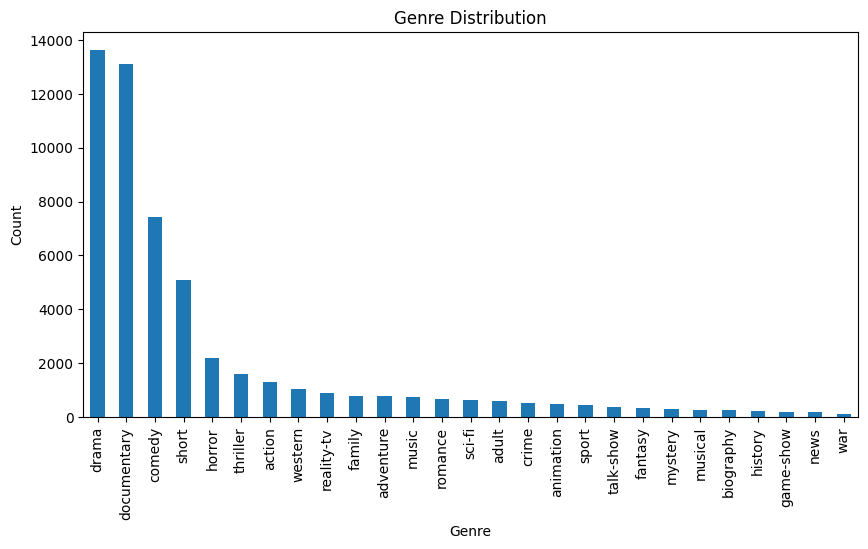

In [11]:
genre_counts.plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

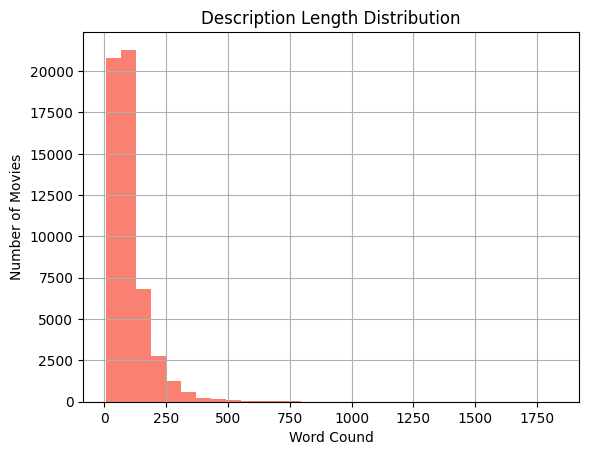

In [12]:
train_data['DESC_LENGTH'] = train_data['DESCRIPTION'].apply(lambda x: len(str(x).split()))

train_data['DESC_LENGTH'].hist(bins = 30, color = 'salmon')
plt.title('Description Length Distribution')
plt.xlabel('Word Cound')
plt.ylabel('Number of Movies')
plt.show()


In [13]:
print(train_data['DESC_LENGTH'].describe())

count    54214.000000
mean       101.907386
std         76.579192
min          6.000000
25%         55.000000
50%         79.000000
75%        121.000000
max       1829.000000
Name: DESC_LENGTH, dtype: float64


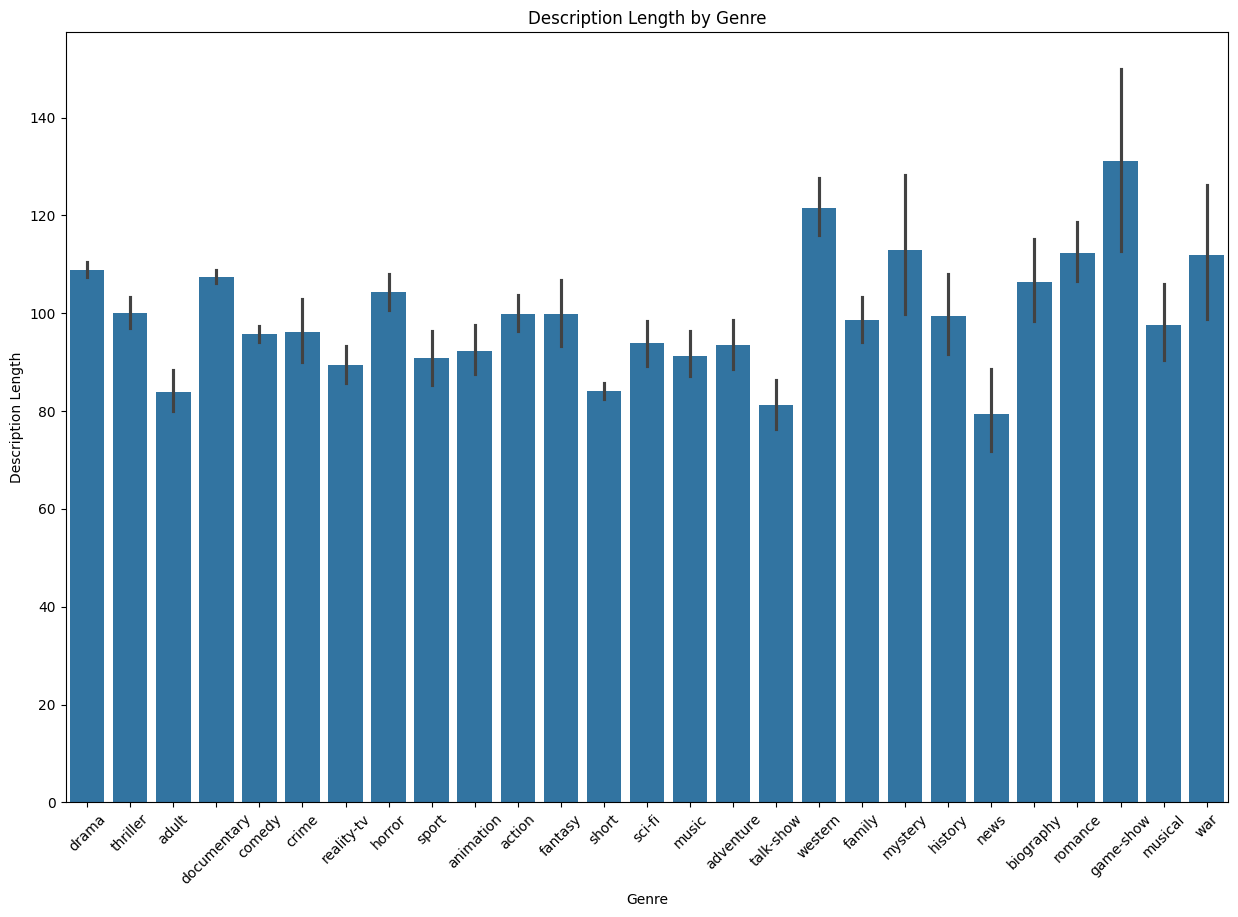

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESC_LENGTH', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

# DATA PREPROCESSING

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
  if not isinstance(text, str):
        return ""

  text = text.lower()

  text = re.sub(r'\S+@\S+', '', text)          #        emails
  text = re.sub(r'[@#]\w+', '', text)          #        hashtags and mentions
  text = re.sub(r'<.*?>', '', text)            #        HTML tags
  text = re.sub(r'\d+', '', text)              #        numbers
  text = re.sub(r'[^\w\s]', '', text)          #        punctuation and special chars
  text = re.sub(r'\b[a-zA-Z]\b', '', text)     #        single chars
  text = re.sub(r'\s+', ' ', text).strip()     #        extra whitespaces

  tokens = nltk.word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return " ".join(tokens)

In [18]:
train_data['CLEAN_DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['CLEAN_DESCRIPTION'] = test_data['DESCRIPTION'].apply(preprocess_text)

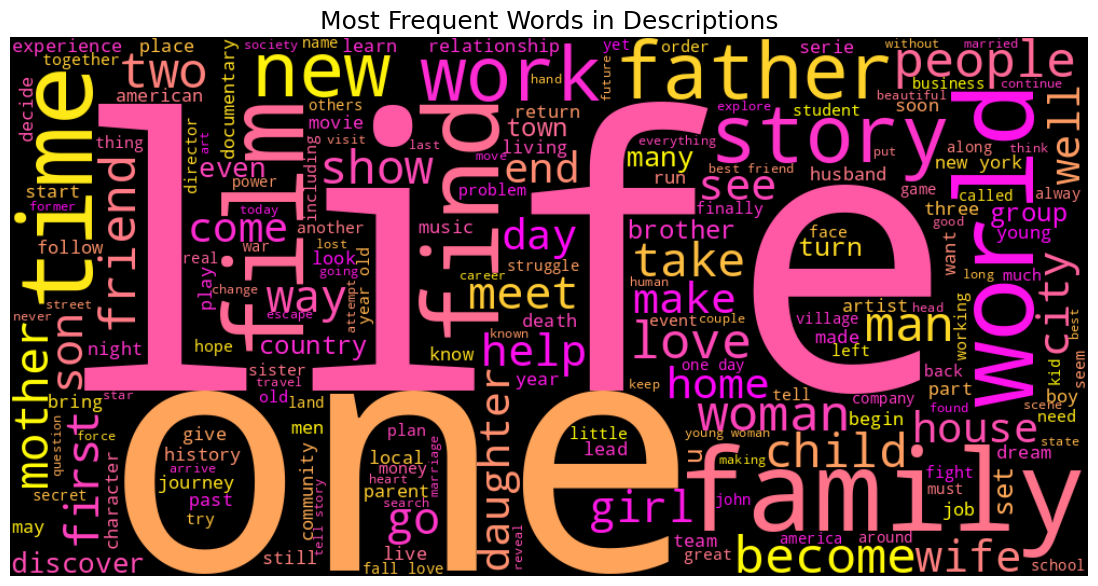

In [19]:
text = " ".join(str(desc) for desc in train_data['CLEAN_DESCRIPTION'])

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='spring',
).generate(text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Descriptions', fontsize=18)
plt.show()


# FEATURE ENGINEERING

In [20]:
tfidf = TfidfVectorizer(
    max_features = 10000,
    stop_words = 'english',
    ngram_range=(1, 2),
    min_df=5
)

tfidf.fit(train_data['CLEAN_DESCRIPTION'])

X_train_tfidf = tfidf.transform(train_data['CLEAN_DESCRIPTION'])
X_test_tfidf = tfidf.transform(test_data['CLEAN_DESCRIPTION'])

le = LabelEncoder()

y_train_le = le.fit_transform(train_data['GENRE'])
y_test_le = le.transform(test_data_solution['GENRE'])

In [21]:
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
genre_mapping

{'action': np.int64(0),
 'adult': np.int64(1),
 'adventure': np.int64(2),
 'animation': np.int64(3),
 'biography': np.int64(4),
 'comedy': np.int64(5),
 'crime': np.int64(6),
 'documentary': np.int64(7),
 'drama': np.int64(8),
 'family': np.int64(9),
 'fantasy': np.int64(10),
 'game-show': np.int64(11),
 'history': np.int64(12),
 'horror': np.int64(13),
 'music': np.int64(14),
 'musical': np.int64(15),
 'mystery': np.int64(16),
 'news': np.int64(17),
 'reality-tv': np.int64(18),
 'romance': np.int64(19),
 'sci-fi': np.int64(20),
 'short': np.int64(21),
 'sport': np.int64(22),
 'talk-show': np.int64(23),
 'thriller': np.int64(24),
 'war': np.int64(25),
 'western': np.int64(26)}

# DATA SPLITTING

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_le, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(43371, 10000)
(10843, 10000)
(43371,)
(10843,)


# MODEL TRAINING

In [23]:
lr_model = LogisticRegression(max_iter=500, random_state=42)

trained_model = lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.25      0.34       263
           1       0.80      0.21      0.34       112
           2       0.48      0.16      0.24       139
           3       0.46      0.06      0.10       104
           4       0.00      0.00      0.00        61
           5       0.51      0.60      0.55      1443
           6       0.38      0.03      0.05       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.79      0.64      2697
           9       0.45      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.95      0.47      0.63        40
          12       0.00      0.00      0.00        45
          13       0.65      0.57      0.61       431
          14       0.66      0.49      0.56       144
          15       0.50      0.02      0.04        50
          16       0.00      0.00      0.00        56
   

# MODEL OPTIMIZATION

In [24]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=500, solver='saga', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_lr_model = grid_search.best_estimator_
print("Best Logistic Regression Model:", grid_search.best_params_)

Best Logistic Regression Model: {'C': 1, 'penalty': 'l2'}


In [25]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Train SVM
svm_model = LinearSVC(random_state=42, max_iter=500)
svm_model.fit(X_train, y_train)

LinearSVC(max_iter=500, random_state=42)

In [26]:
models = {
    'Logistic Regression': best_lr_model,
    'Naive Bayes': nb_model,
    'SVM': svm_model
}

# MODEL EVALUATION


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.25      0.34       263
           1       0.80      0.21      0.34       112
           2       0.48      0.16      0.24       139
           3       0.46      0.06      0.10       104
           4       0.00      0.00      0.00        61
           5       0.51      0.59      0.55      1443
           6       0.44      0.04      0.07       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.79      0.64      2697
           9       0.45      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.95      0.47      0.63        40
          12       0.00      0.00      0.00        45
          13       0.65      0.57      0.61       431
          14       0.66      0.48      0.55       144
          15       0.33      0.02      0.04        50
          16       0.00      0.00   

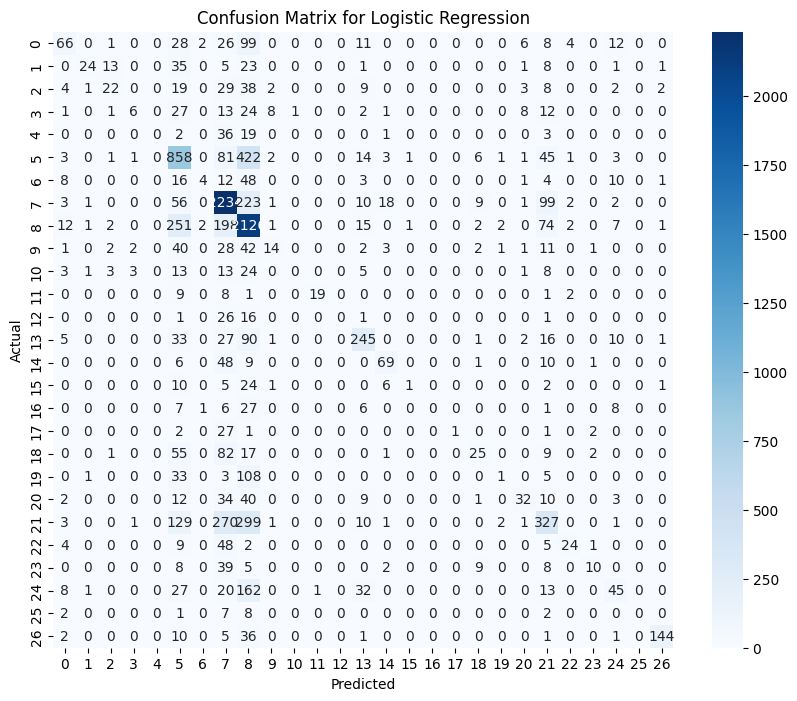


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.04      0.08       263
           1       0.80      0.04      0.07       112
           2       0.47      0.06      0.11       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.50      0.45      0.47      1443
           6       0.00      0.00      0.00       107
           7       0.57      0.89      0.69      2659
           8       0.46      0.83      0.59      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       1.00      0.03      0.05        40
          12       0.00      0.00      0.00        45
          13       0.77      0.30      0.44       431
          14       1.00      0.04      0.08       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00 

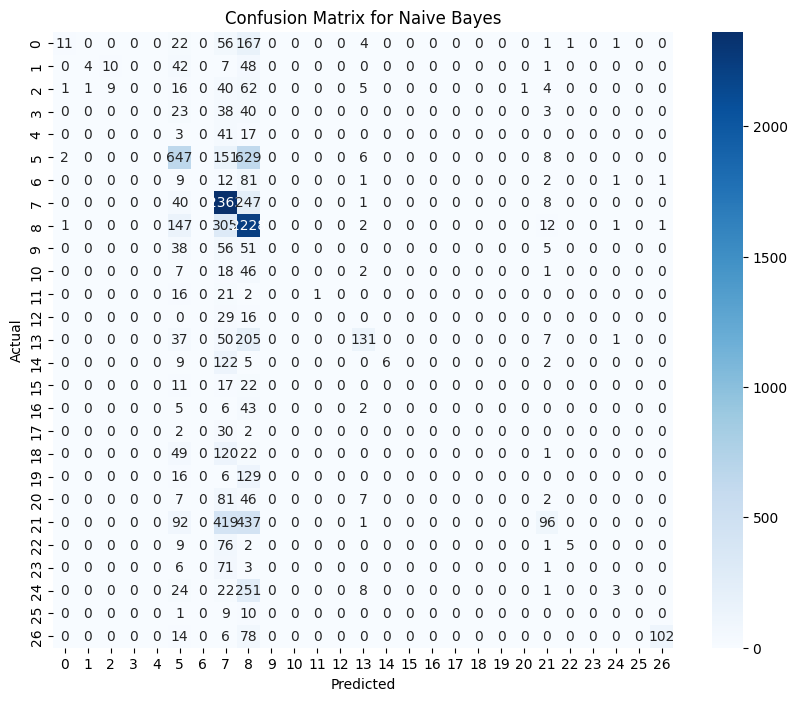


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.31      0.36       263
           1       0.70      0.46      0.56       112
           2       0.36      0.21      0.26       139
           3       0.28      0.12      0.17       104
           4       0.00      0.00      0.00        61
           5       0.50      0.58      0.54      1443
           6       0.16      0.06      0.08       107
           7       0.69      0.80      0.74      2659
           8       0.56      0.69      0.62      2697
           9       0.28      0.15      0.19       150
          10       0.23      0.04      0.07        74
          11       0.87      0.68      0.76        40
          12       0.00      0.00      0.00        45
          13       0.60      0.63      0.62       431
          14       0.56      0.55      0.55       144
          15       0.20      0.06      0.09        50
          16       0.07      0.02      0.03        5

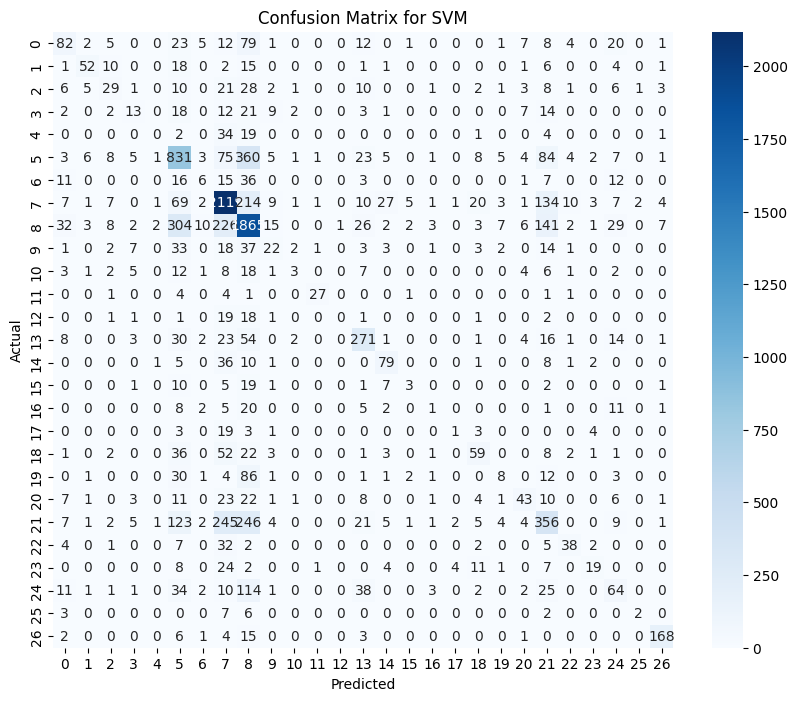


Best Model based on weighted avg f1-score: SVM


In [27]:
for model_name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


best_model_name = max(models, key=lambda k: classification_report(y_val, models[k].predict(X_val), output_dict=True)['weighted avg']['f1-score'])
print(f"\nBest Model based on weighted avg f1-score: {best_model_name}")

# MODEL PREDICTION

In [29]:
samples = X_test_tfidf[:2]

samples_predictions = svm_model.predict(samples)


predicted_genres_df = pd.DataFrame({'movie_id': range(1, len(samples_predictions) + 1), 'predicted_genre': samples_predictions})
print(predicted_genres_df)

   movie_id  predicted_genre
0         1                5
1         2                8


In [34]:
samples_text = test_data['CLEAN_DESCRIPTION'][:2]

samples_tfidf = tfidf.transform(samples_text)

samples_predictions = svm_model.predict(samples_tfidf)

predicted_genres = le.inverse_transform(samples_predictions)

predicted_genres_df = pd.DataFrame({
    'movie_id': range(1, len(samples_predictions) + 1),
    'description': samples_text.tolist(),
    'predicted_genre': predicted_genres
})

print(predicted_genres_df)

   movie_id                                        description predicted_genre
0         1  lr brane love life car apartment job especiall...          comedy
1         2  spain march quico naughty child three belongin...           drama
